In [13]:
import pandas as pd
import numpy as np

from fastai.vision import *

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from pathlib import Path

def plot_confusion_matrix_from_lists(y_true, y_pred,
                                     classes_ordered=None,
                                     show_percentages=False,
                                     for_model=None,
                                     save_as=None,
                                    ):
    conf_m = confusion_matrix(y_true, y_pred)
    classes = sorted(list(set(y_true) | set(y_pred)))
    df_conf_m = pd.DataFrame(conf_m, index=classes, columns=classes)

    if show_percentages:
        df_conf_m["sum"] = df_conf_m.sum(axis=1)
        df_conf_m = df_conf_m.div(df_conf_m["sum"]*0.01, axis=0)
        df_conf_m = df_conf_m.drop(columns=["sum"])

    if classes_ordered:
        classes_ordered = [species for species in classes_ordered if species in classes] # drop classes from order that are missing from the data
        df_conf_m_ordered = pd.DataFrame(index=classes_ordered, columns=classes_ordered)
        for idx in classes_ordered:
            for col in classes_ordered:
                df_conf_m_ordered.loc[idx, col] = df_conf_m.loc[idx, col]
        df_conf_m = df_conf_m_ordered

    plt.figure(figsize = (12,12))
    if show_percentages:
        df_conf_m = df_conf_m.astype('float32')
        fmt = ".1f"
    else:
        df_conf_m = df_conf_m.astype('int32')
        fmt = "d"
    ax = sns.heatmap(df_conf_m, annot=True,
                     cmap=sns.color_palette("Blues", n_colors=100),
                     cbar=False, fmt=fmt)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    title = "Confusion matrix"
    if for_model:
        title = f"Confusion matrix for model {for_model}"
    if show_percentages:
        title += " (% of actual per species)"
    plt.title(title)

    plt.tight_layout()

    if save_as:
        plt.savefig(save_as)
        
        
def plot_confusion_matrix_from_df(df_conf_m,
                                    show_percentages=False,
                                    for_model=None,
                                    save_as=None,
                                    ):
    if show_percentages:
        df_conf_m["sum"] = df_conf_m.sum(axis=1)
        df_conf_m = df_conf_m.div(df_conf_m["sum"]*0.01, axis=0)
        df_conf_m = df_conf_m.drop(columns=["sum"])

#     if classes_ordered:
#         classes_ordered = [species for species in classes_ordered if species in classes] # drop classes from order that are missing from the data
#         df_conf_m_ordered = pd.DataFrame(index=classes_ordered, columns=classes_ordered)
#         for idx in classes_ordered:
#             for col in classes_ordered:
#                 df_conf_m_ordered.loc[idx, col] = df_conf_m.loc[idx, col]
#         df_conf_m = df_conf_m_ordered

    plt.figure(figsize = (12,12))
    if show_percentages:
        df_conf_m = df_conf_m.astype('float32')
        fmt = ".1f"
    else:
        df_conf_m = df_conf_m.astype('int32')
        fmt = "d"
    ax = sns.heatmap(df_conf_m, annot=True,
                     cmap=sns.color_palette("Blues", n_colors=100),
                     cbar=False, fmt=fmt)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    title = "Confusion matrix"
    if for_model:
        title = f"Confusion matrix for model {for_model}"
    if show_percentages:
        title += " (% of actual per species)"
    plt.title(title)

    plt.tight_layout()

    if save_as:
        plt.savefig(save_as)
        


In [7]:
learn = load_learner("gabon_wildlife_wwf_retrain/saved_models","stage4f-5epochs-576_768-rescaled.pkl")

In [26]:
classes = learn.data.classes
conf_m = np.load("gabon_wildlife_wwf_retrain/conf_m-stage4f-5epochs-576_768-rescaled.npy")
df_conf_m = pd.DataFrame(conf_m, index=classes, columns=classes)
df_conf_m

,Bird,Blank,Buffalo_African,Cat_Golden,Chevrotain_Water,Chimpanzee,Civet_African_Palm,Duiker_Blue,Duiker_Red,Duiker_Yellow_Backed,...,Mandrillus,Mongoose,Mongoose_Black_Footed,Monkey,Pangolin,Porcupine_Brush_Tailed,Rail_Nkulengu,Rat_Giant,Rodent,Squirrel
Bird,528,42,0,0,0,19,0,20,21,3,...,0,1,1,1,0,0,4,0,0,23
Blank,109,4429,7,0,0,33,5,45,49,4,...,2,6,2,7,0,6,0,20,19,24
Buffalo_African,6,4,349,0,1,10,0,3,20,16,...,0,1,0,0,0,0,0,2,0,0
Cat_Golden,5,0,0,18,0,15,1,14,6,0,...,0,0,6,3,0,0,0,1,0,3
Chevrotain_Water,9,15,0,0,140,7,24,9,73,5,...,0,11,2,1,0,35,0,1,25,3
Chimpanzee,28,5,0,0,1,906,0,17,7,1,...,6,6,1,4,0,0,0,16,0,15
Civet_African_Palm,0,6,0,0,0,0,30,1,1,0,...,0,0,4,0,0,1,0,2,4,2
Duiker_Blue,100,166,0,0,5,28,24,4023,273,4,...,13,2,1,40,0,21,0,5,27,155
Duiker_Red,63,57,1,0,6,57,4,175,4458,29,...,14,5,2,7,1,7,0,28,6,18
Duiker_Yellow_Backed,5,27,8,0,4,22,10,33,67,824,...,1,3,2,2,0,7,0,14,4,0


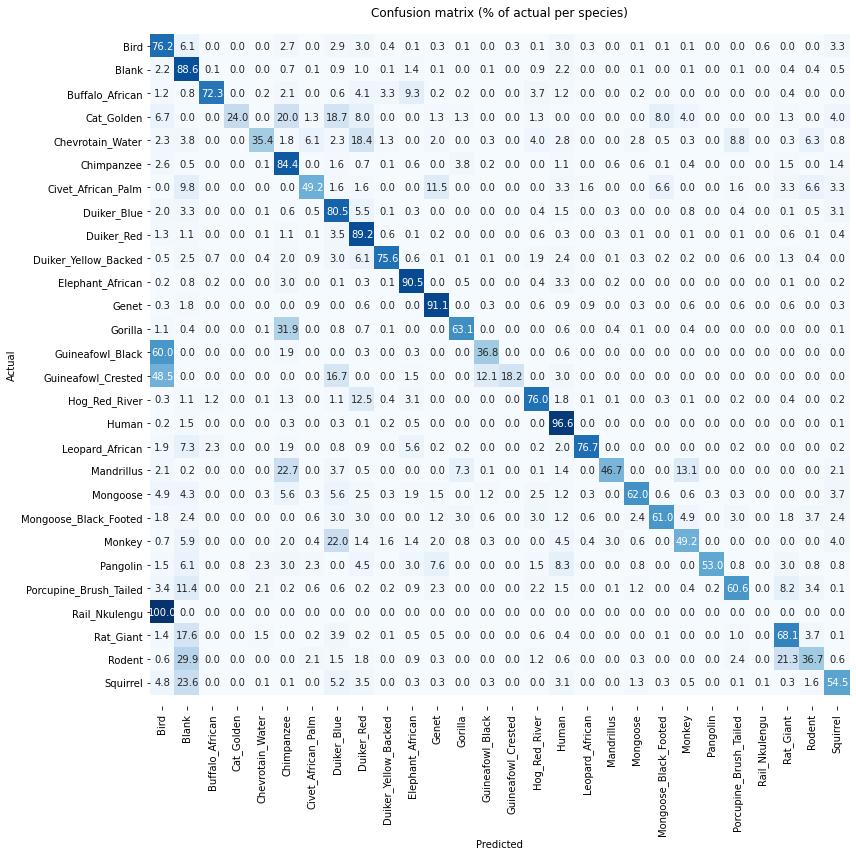

In [27]:
plot_confusion_matrix_from_df(df_conf_m,
                              show_percentages=True,
                              save_as="gabon_wildlife_wwf_retrain/conf_m_stage4f_validation_perc.png"
                            )

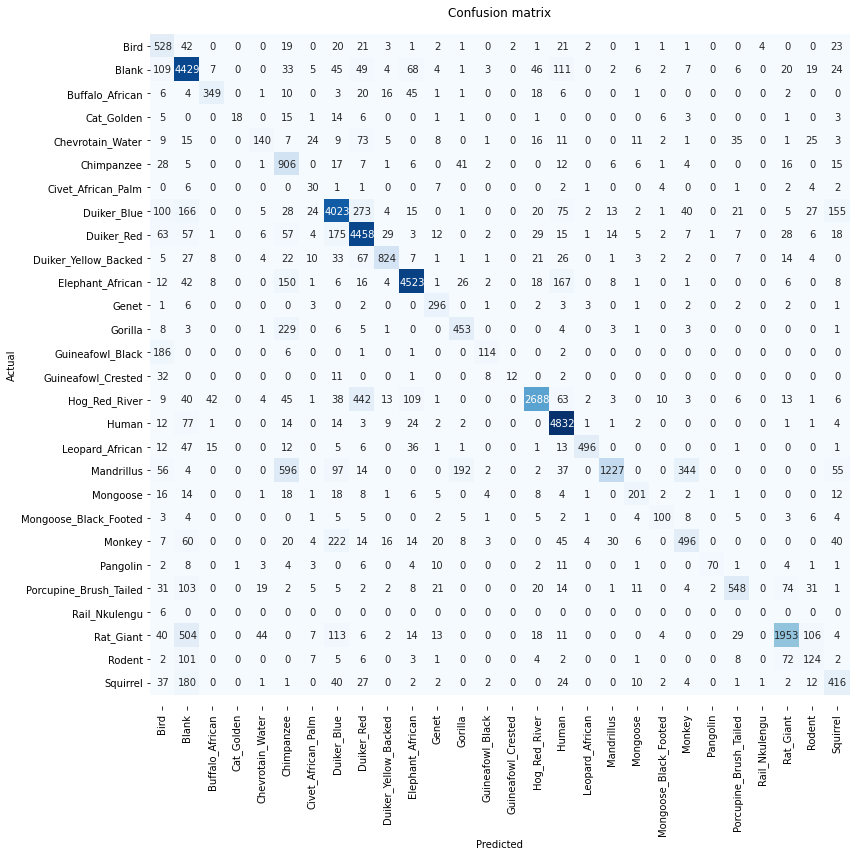

In [28]:
plot_confusion_matrix_from_df(df_conf_m.iloc[:,:-1],
                              save_as="gabon_wildlife_wwf_retrain/conf_m_stage4f_validation.png"
                            )

In [29]:
classes = learn.data.classes
conf_m = np.load("gabon_wildlife_training/training/conf_m-stage4a-5epochs-576_768-rescaled.npy")
df_conf_m = pd.DataFrame(conf_m, index=classes, columns=classes)
df_conf_m

,Bird,Blank,Buffalo_African,Cat_Golden,Chevrotain_Water,Chimpanzee,Civet_African_Palm,Duiker_Blue,Duiker_Red,Duiker_Yellow_Backed,...,Mandrillus,Mongoose,Mongoose_Black_Footed,Monkey,Pangolin,Porcupine_Brush_Tailed,Rail_Nkulengu,Rat_Giant,Rodent,Squirrel
Bird,541,44,0,0,0,0,0,38,12,0,...,3,1,1,3,2,0,4,0,1,7
Blank,54,4518,7,1,1,0,4,98,50,5,...,9,2,0,8,0,15,1,34,3,18
Buffalo_African,5,6,352,0,0,1,0,5,18,4,...,0,0,0,0,1,3,0,1,0,0
Cat_Golden,7,0,0,30,0,3,2,14,6,0,...,1,0,2,1,0,0,0,0,0,1
Chevrotain_Water,40,19,0,1,166,0,5,9,34,2,...,0,3,2,1,3,55,4,0,16,1
Chimpanzee,35,10,0,0,0,706,0,31,10,1,...,62,5,0,21,0,0,0,18,0,5
Civet_African_Palm,0,6,0,0,0,0,33,1,2,0,...,0,0,3,0,1,1,1,1,2,0
Duiker_Blue,64,191,0,1,8,2,4,4334,206,2,...,10,5,4,23,0,9,0,8,26,32
Duiker_Red,30,57,0,0,6,3,3,213,4518,10,...,10,0,6,11,0,4,1,19,3,9
Duiker_Yellow_Backed,10,31,19,0,6,2,4,23,82,804,...,1,1,0,4,0,0,0,17,2,0


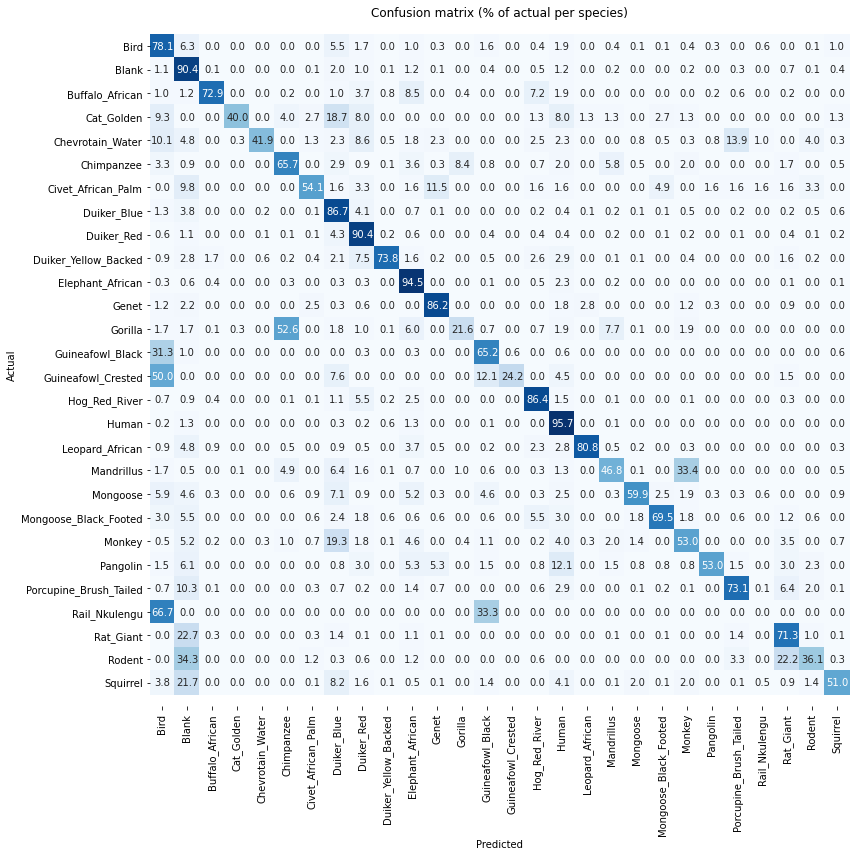

In [30]:
plot_confusion_matrix_from_df(df_conf_m,
                              show_percentages=True,
                              save_as="gabon_wildlife_wwf_retrain/conf_m_stage4a_validation_perc.png"
                            )

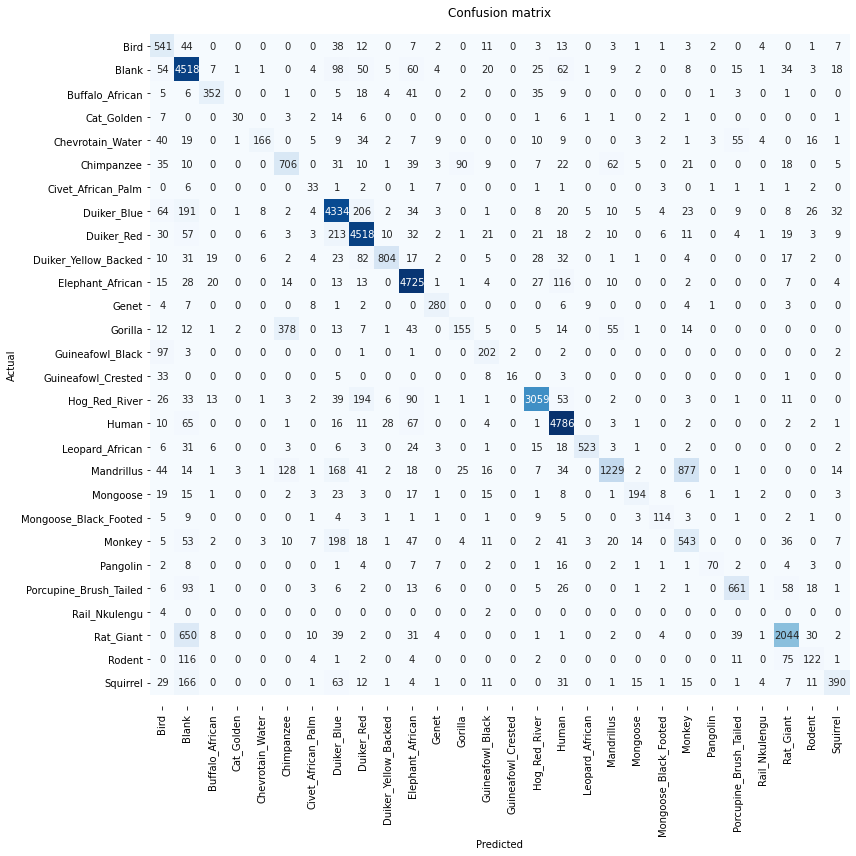

In [31]:
plot_confusion_matrix_from_df(df_conf_m.iloc[:,:-1],
                              save_as="gabon_wildlife_wwf_retrain/conf_m_stage4a_validation.png"
                            )